<a href="https://colab.research.google.com/github/dasd412/my-first-ai/blob/main/PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것.
# 분산은 데이터가 널리 퍼져있는 정도를 뜻한다.
# 주성분은 분산이 가장 큰 방향의 벡터.(일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.)
# 주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어든다.

# 참고 : 다차원 배열의 차원과 일차원 배열의 차원은 다른 의미. 일차원 배열의 차원은 원소의 개수를 뜻함.

In [2]:
# 데이터 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits=np.load('fruits_300.npy')

# (샘플 개수, 너비, 높이) 크기의 3차원 배열을 (샘플 개수, 너비 * 높이)의 2차원 배열로 변경
fruits_2d=fruits.reshape(-1,100*100)

--2023-07-23 00:31:38--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-23 00:31:38--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-23 00:31:39--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)# n_components는 주성분 개수
pca.fit(fruits_2d)# 비지도 학습이므로 타깃 설정 안함

PCA(n_components=50)

In [5]:
print(pca.components_.shape) # (주성분 개수, 원본 데이터 특성 개수)로 출력됨.

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr,ratio=1):
    n=len(arr)
    # 한줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수 계산
    rows=int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows<2 else 10

    fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10+j < n :# n개까지만 그림.
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

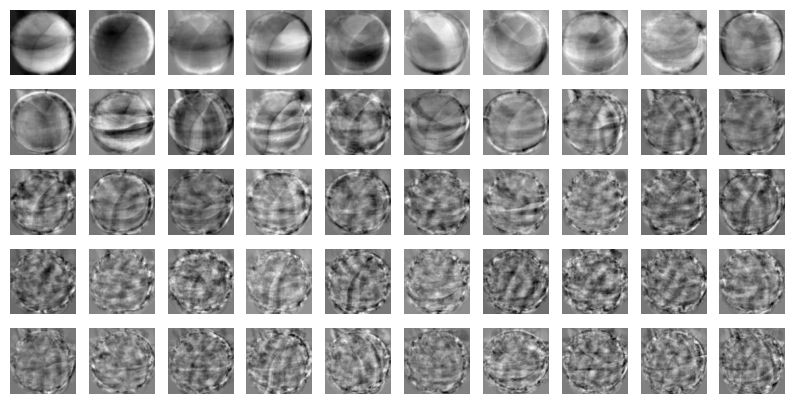

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca=pca.transform(fruits_2d) #차원 축소
print(fruits_pca.shape)

(300, 50)


In [10]:
# 원본 데이터 재구성하기
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


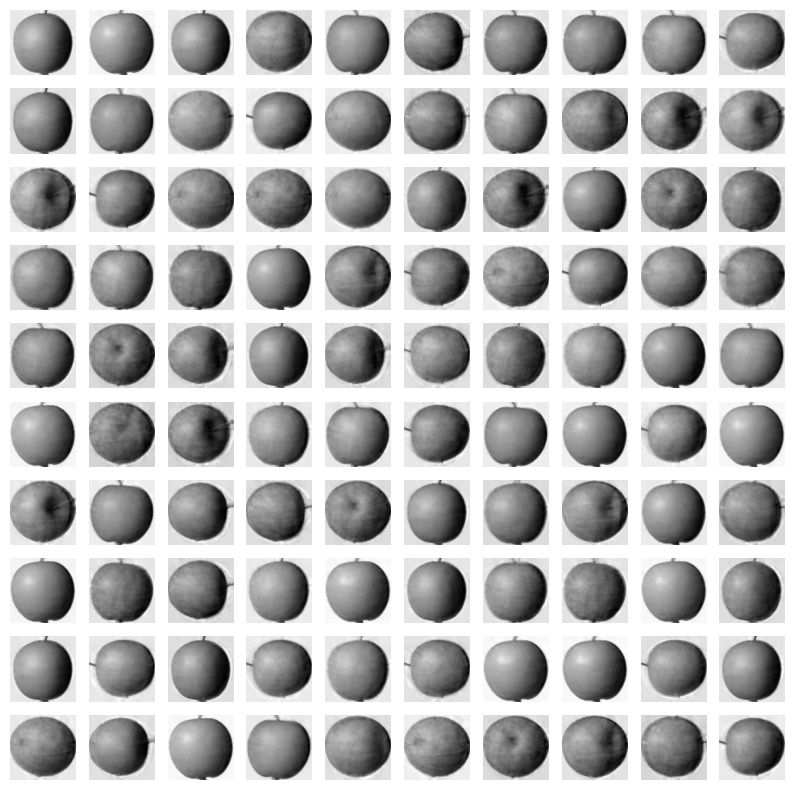

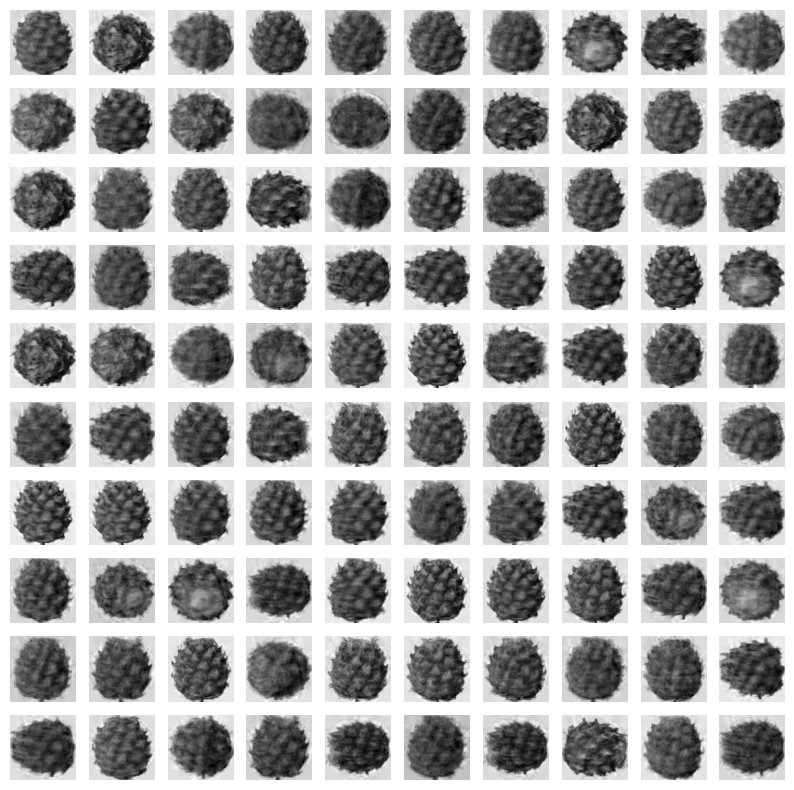

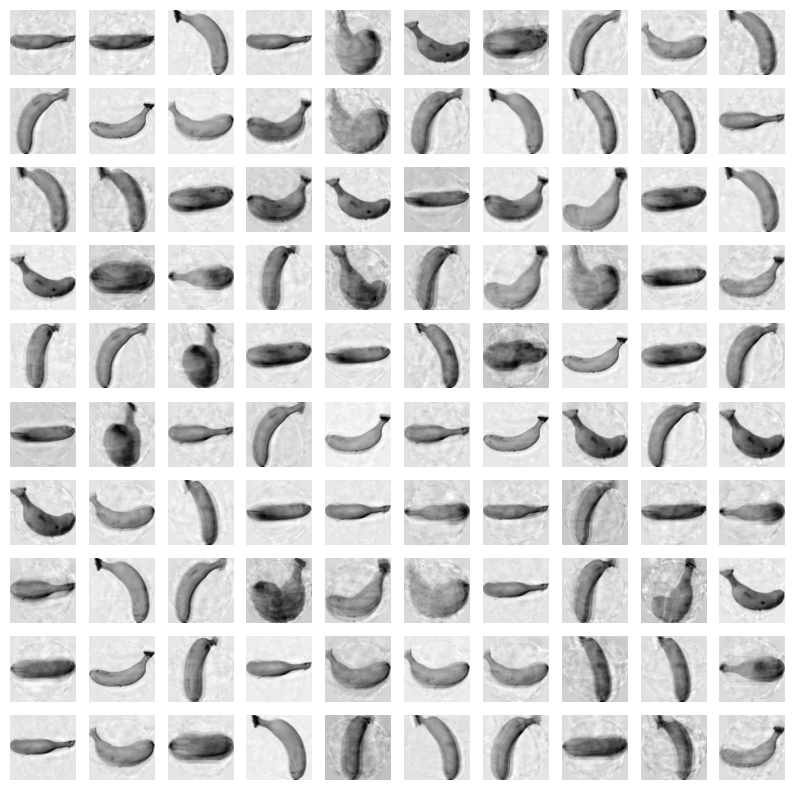

In [11]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [12]:
# 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다.
print(np.sum(pca.explained_variance_ratio_))

0.9215367102805175


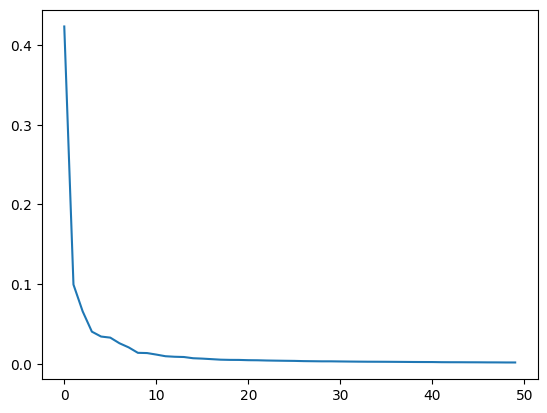

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [14]:
# 다른 알고리즘과 함꼐 사용하기
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [15]:
target=np.array([0]*100+[1]*100+[2]*100)

In [16]:
from sklearn.model_selection import cross_validate

scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.9281232357025146


In [17]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.020414447784423827


In [18]:
pca=PCA(n_components=0.5)# 설명된 분산의 50%에 달하는 주성분 찾기
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
print(pca.n_components_)

2


In [20]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.021445083618164062


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


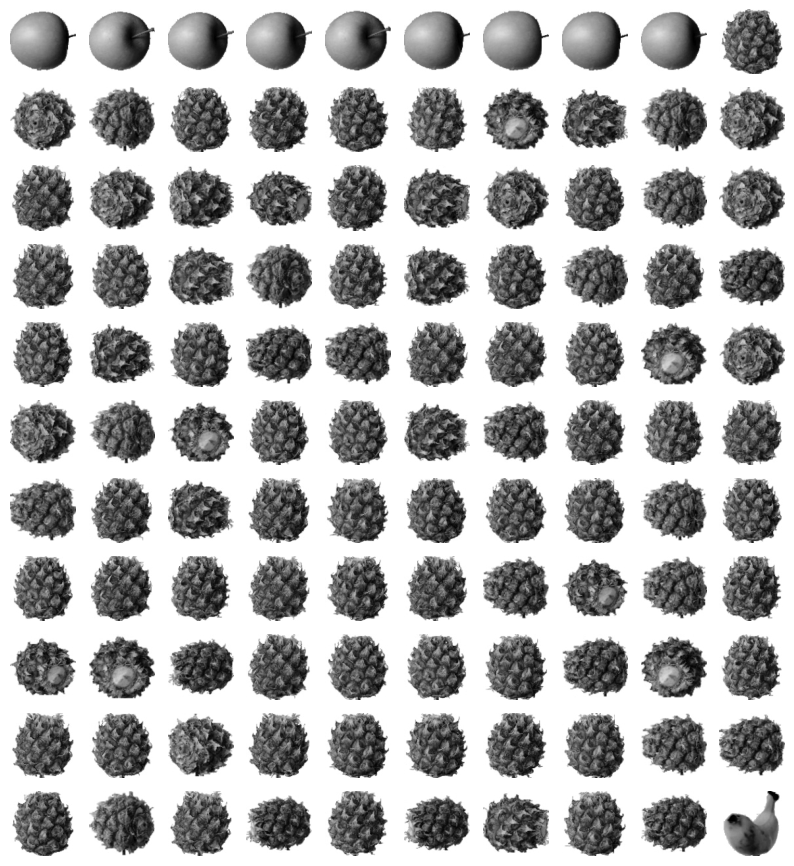

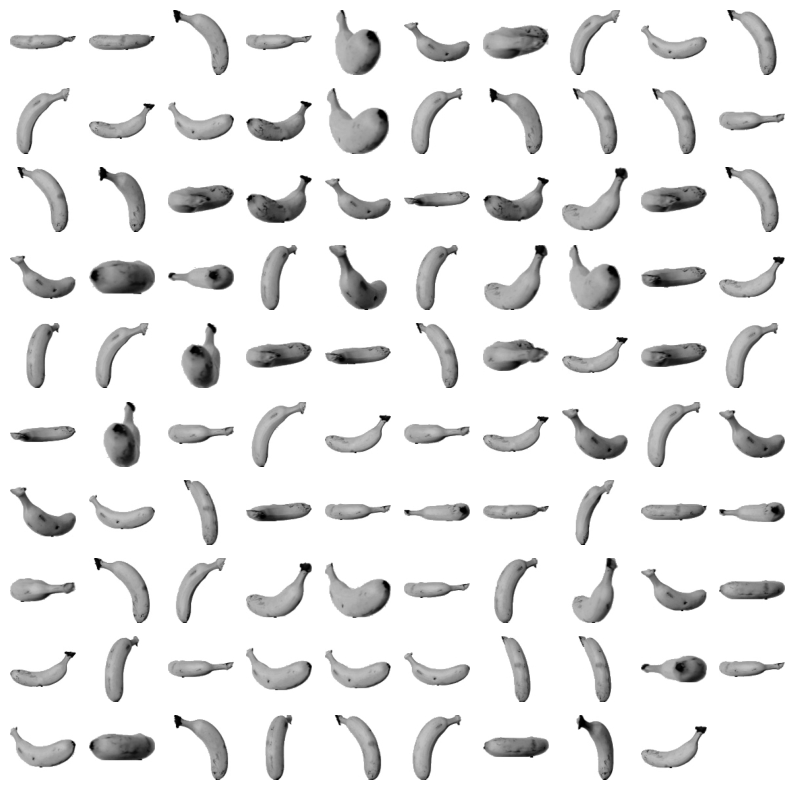

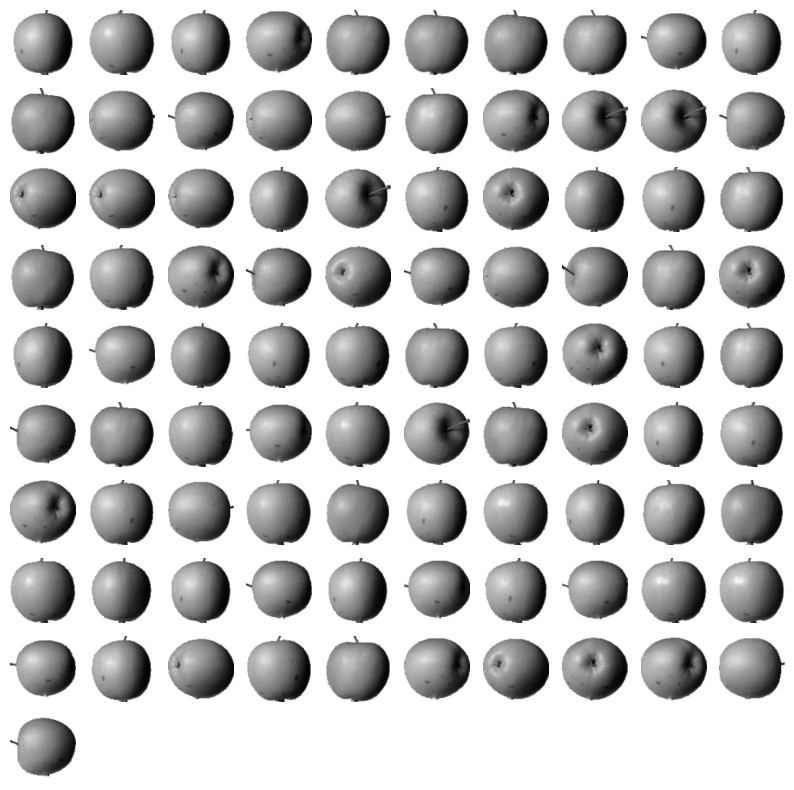

In [23]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_==label])
    print('\n')

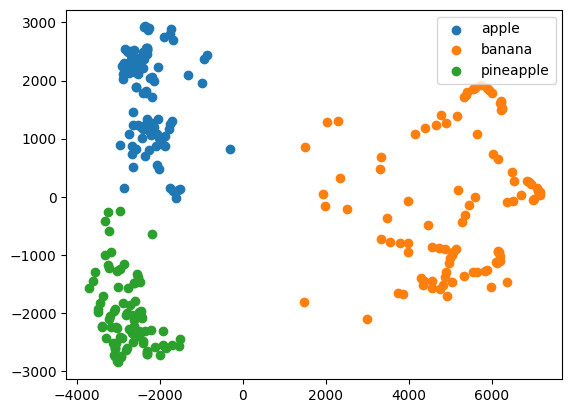

In [24]:
# 훈련 데이터의 차원을 줄이면 시각화가 좋다.
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()